In [189]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#!pip install textblob
import  textblob
import xgboost
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from textblob import Word 
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

import spacy
from spacy import displacy
from spacy.matcher import Matcher


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

Using TensorFlow backend.


In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances

In [47]:
#dataframe job postings
data=pd.read_csv('data job posts.csv')

In [48]:
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [50]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

### Data Selection

In [51]:
# Useful columns from datasets
data=data[['jobpost', 'Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC','Year', 'Month', 'IT']]

In [52]:
data

,jobpost,Title,Company,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,Yerevan Brandy Company,NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,Senior Creative UX/ UI Designer,Technolinguistics NGO,A tech startup of Technolinguistics based in N...,- Work closely with product and business teams...,- At least 5 years of experience in Interface/...,As a company Technolinguistics has a mandate t...,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,- Establish and manage Category Management dev...,"- University degree, ideally business related;...",NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,"- Develop, establish and maintain marketing st...","- Degree in Business, Marketing or a related f...",NaN,2015,12,False
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,Head of Online Sales Department,San Lazzaro LLC,San Lazzaro LLC is looking for a well-experien...,- Handle the project activites of the online s...,- At least 1 year of experience in online sale...,San Lazzaro LLC works with several internation...,2015,12,False


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 10 columns):
jobpost           19001 non-null object
Title             18973 non-null object
Company           18994 non-null object
JobDescription    15109 non-null object
JobRequirment     16479 non-null object
RequiredQual      18517 non-null object
AboutC            12470 non-null object
Year              19001 non-null int64
Month             19001 non-null int64
IT                19001 non-null bool
dtypes: bool(1), int64(2), object(7)
memory usage: 1.3+ MB


In [70]:
data['Title'].fillna(data['Title'].mode()[0], inplace=True)
data['Company'].fillna(data['Company'].mode()[0], inplace=True)
data['JobDescription'].fillna(data['JobDescription'].mode()[0], inplace=True)
data['JobRequirment'].fillna(data['JobRequirment'].mode()[0], inplace=True)
data['RequiredQual'].fillna(data['RequiredQual'].mode()[0], inplace=True)
data['AboutC'].fillna(data['AboutC'].mode()[0], inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 10 columns):
jobpost           19001 non-null object
Title             19001 non-null object
Company           19001 non-null object
JobDescription    19001 non-null object
JobRequirment     19001 non-null object
RequiredQual      19001 non-null object
AboutC            19001 non-null object
Year              19001 non-null int64
Month             19001 non-null int64
IT                19001 non-null bool
dtypes: bool(1), int64(2), object(7)
memory usage: 1.3+ MB


In [72]:
top_20=pd.DataFrame(data.Title.value_counts().head(20))

In [73]:
top_20

,Title
Accountant,356
Chief Accountant,219
Medical Representative,216
Sales Manager,166
Administrative Assistant,155
Lawyer,151
Software Developer,134
Project Manager,117
English Language Courses,109
Web Developer,101


### Job Posting by Year

In [170]:
# Number of job posts by titles
classes = data['Title'].value_counts()[:21]
keys = classes.keys().to_list()

data = data[data['Title'].isin(keys)]
data['Title'].value_counts()
y=pd.DataFrame(data.Year.value_counts().reset_index())
y.rename(columns={'index':'Year','Year':'Job_posts'},inplace=True)
y.sort_values(by='Year',inplace=True)
y.reset_index(drop=True)

,Year,Job_posts
0,2004,84
1,2005,154
2,2006,178
3,2007,229
4,2008,245
5,2009,163
6,2010,210
7,2011,216
8,2012,274
9,2013,267


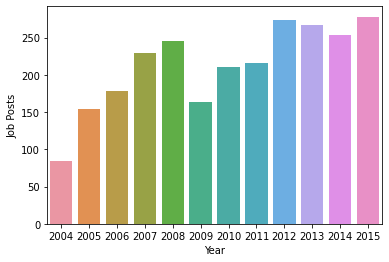

In [91]:
sns.barplot(x='Year',y='Job Posts',data=y)
plt.show()

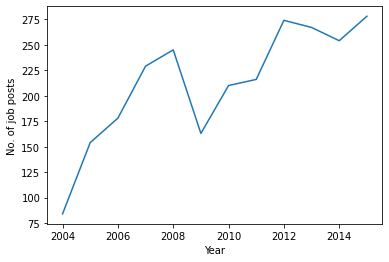

In [92]:
plt.plot('Year','Job Posts',data=y)
plt.xlabel('Year')
plt.ylabel('No. of job posts')
plt.show()

### Job Posting by month

In [171]:
m=pd.DataFrame(data.Month.value_counts().reset_index())
m.rename(columns={'index':'Month','Month':'Job_posts'},inplace=True)
m.sort_values(by='Month',inplace=True)
m.reset_index(drop=True)

,Month,Job_posts
0,1,201
1,2,232
2,3,231
3,4,201
4,5,209
5,6,210
6,7,212
7,8,211
8,9,229
9,10,225


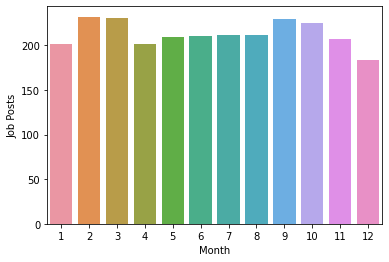

In [95]:
sns.barplot(x='Month',y='Job Posts',data=m)
plt.show()

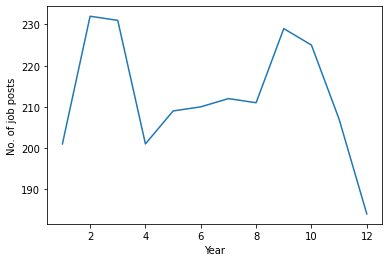

In [96]:
plt.plot('Month','Job Posts',data=m)
plt.xlabel('Year')
plt.ylabel('No. of job posts')
plt.show()


### Top job posts every Year(2004-2015)

In [100]:
y['Year']

11    2004
10    2005
8     2006
5     2007
4     2008
9     2009
7     2010
6     2011
1     2012
2     2013
3     2014
0     2015
Name: Year, dtype: int64

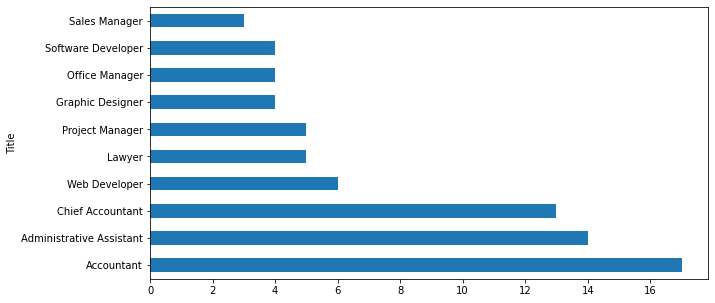

2004


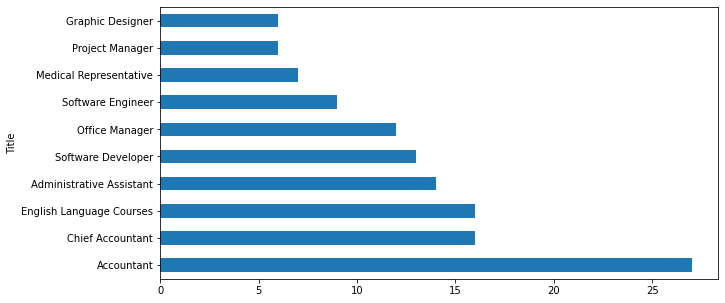

2005


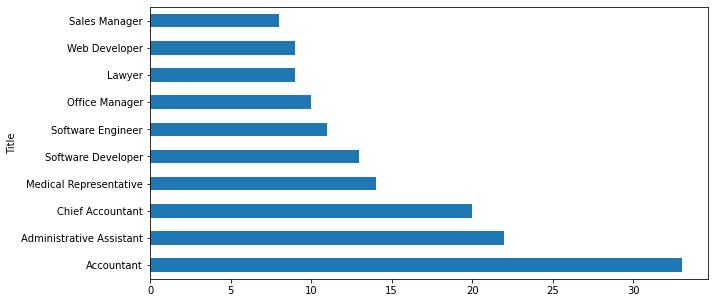

2006


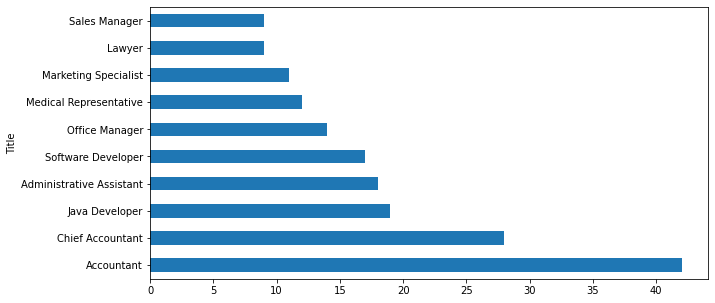

2007


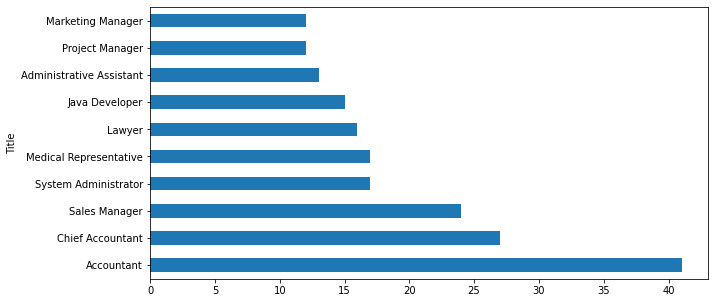

2008


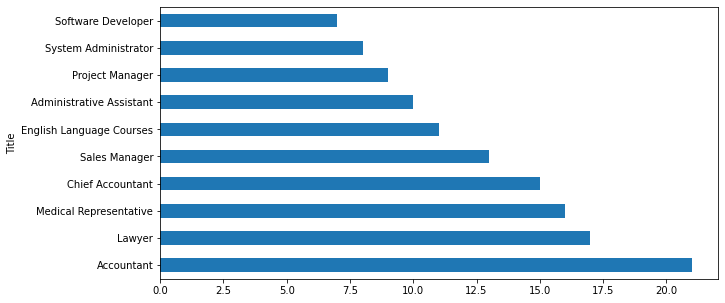

2009


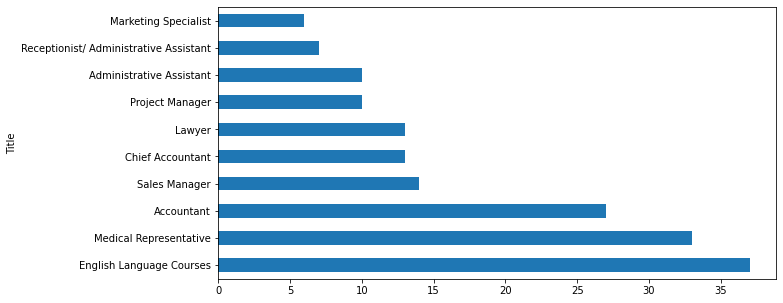

2010


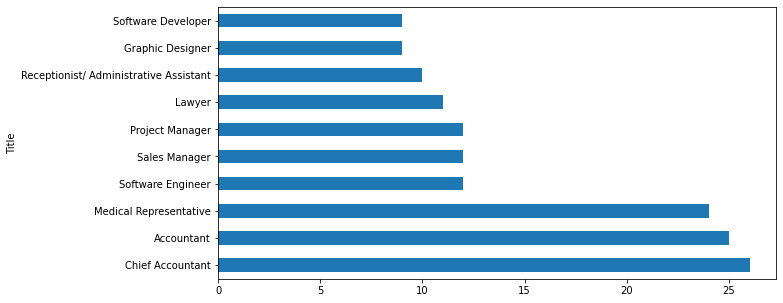

2011


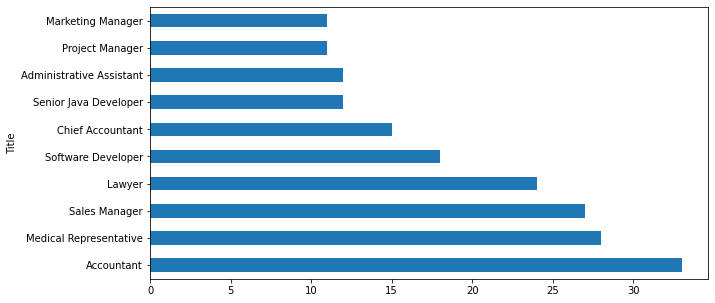

2012


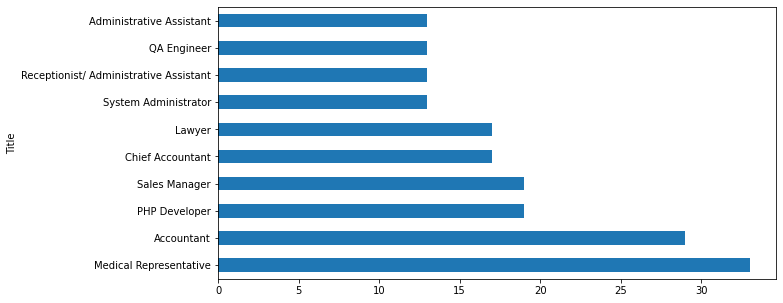

2013


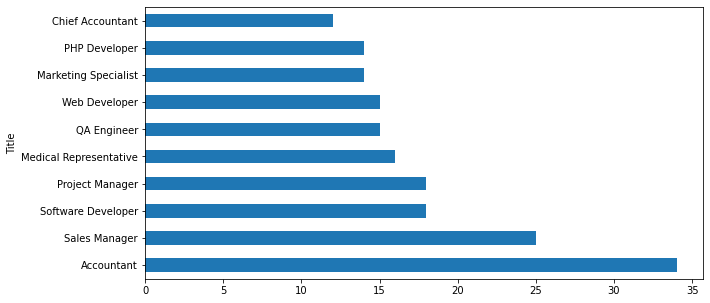

2014


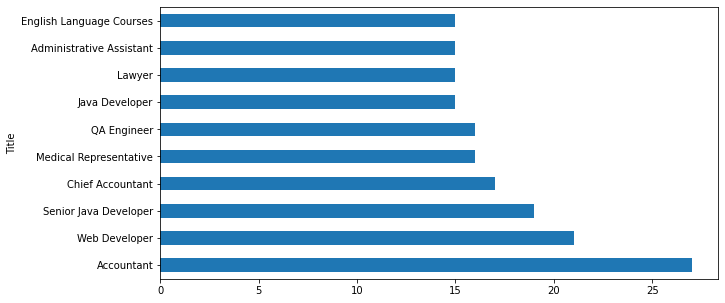

2015


In [113]:
for x in y['Year']:
    yr=data.loc[job_post.Year==x].groupby('Title').count().sort_values('jobpost',ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    yr.jobpost.plot(kind='barh')
    plt.show()
    print(x)

In [141]:
c=pd.DataFrame(data.Company.value_counts().reset_index()).head(10)
c.rename(columns={'index':'Company','Company':'Job_posts'})

,Company,Job_posts
0,Career Center NGO,178
1,SAS Group LLC,25
2,Virtual Solution Global Services LLC,23
3,ArmenTel CJSC,23
4,Boomerang Software LLC,21
5,IUNetworks LLC,17
6,Joomag AM LLC,15
7,Sourcio CJSC,14
8,"EPAM Systems, Inc.",14
9,BetArchitect LLC,14


In [174]:
Y_1=pd.DataFrame(data.Year.value_counts().reset_index())
Y_1.rename(columns={'index':'Year','Year':'Job_posts'})
Y_1.sort_values(by='Year',inplace=True)
Y_1.reset_index(drop=True)

,index,Year
0,2004,84
1,2005,154
2,2009,163
3,2006,178
4,2010,210
5,2011,216
6,2007,229
7,2008,245
8,2014,254
9,2013,267


### Supervised Learning

In [180]:
   df=data[['RequiredQual','IT']] 

In [184]:
df['RequiredQual'] = df['RequiredQual'].astype(str)

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron'))

C:\Users\Nanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Nanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Calculating Sentiment analysis using Textblob module

In [192]:
df['sentiment'] = df["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [193]:
df.IT.value_counts()

False    1951
True      601
Name: IT, dtype: int64

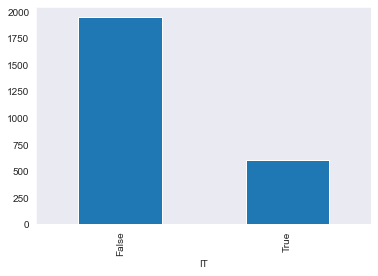

In [194]:
df.groupby('IT')['RequiredQual'].count().plot('bar')
plt.show()

In [195]:
# convert label to a numeric variable
df['IT'] = np.where(df.IT==False,0,1)

In [196]:
df.head(5)

,RequiredQual,IT,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment
4,- University degree; economical background is ...,1,25,4,5,0,0,0.242857
19,"As a GD you are creative, innovative and have\...",1,47,16,20,3,3,0.216970
20,- Fluency in spoken and written English; knowl...,0,35,13,18,3,0,0.264394
21,- University degree in Jurisprudence;\n- Exper...,0,25,2,8,0,0,0.212245
29,- University degree in Finance or Accounting;\...,0,69,10,10,0,0,0.028333


### Split the data into train & Test

In [197]:
# train features and labels 
y = df['IT']
X = df['RequiredQual']

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2169,)
(383,)
(2169,)
(383,)


### Creating user defined functions for clean the text and pre-process the data

In [198]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [199]:
stop = set(nltk.corpus.stopwords.words('english'))

In [200]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)     #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
   # text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
   # text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [201]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [202]:
X_train=pre_process(X_train)
X_test =pre_process(X_test)

#### Vectorization (count, tfidf) for both train & test

In [203]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(2, 3),  
                             encoding='latin-1',
                             max_df=0.9,min_df=0.001)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [206]:
xtrain_count

<2169x14019 sparse matrix of type '<class 'numpy.int64'>'
	with 140384 stored elements in Compressed Sparse Row format>

### View the document term metrics

In [207]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [208]:
dtm2.head(10)

,a engineer,a engineer experience,a engineer role,a engineer software,a process,a process methodology,a role,a role ideally,a self,a self process,...,year successful formal,year supervisor,year supervisor responsibility,year upper,year upper management,year work,year work experience,year work least,year working,year working experience
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(2, 3),max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(df['RequiredQual'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [210]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(2,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df['RequiredQual'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Topic Modeling

In [211]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=15, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [212]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['work experience ability work excellent knowledge knowledge armenian good knowledge english language least year armenian russian university degree higher education',
 'html i least year experience quality assurance tormented personality education good knowledge experience all education good year experience all html experience all html',
 'adore illustration adore photoshop adore photoshop adore photoshop adore illustration adore photoshop good knowledge english language communication experience plus technical level advanced knowledge',
 'client knowledge advanced computer essential would advantage though essential though essential would essential would would advantage client knowledge english medicine pharmacy client pharmacy client knowledge',
 'c program knowledge c program field higher education field higher expel outlook internet field knowledge c c program good outlook internet basic knowledge medicine pharmacology',
 'degree medicine university degree medicine degree medicine ph

### Online Job Data-Word Clouds

In [213]:
frequency_words_wo_stop= {}
for data in df['RequiredQual']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [214]:
frequency_words_wo_stop

{'-': 22623,
 'university': 794,
 'degree': 1410,
 ';': 17205,
 'economical': 6,
 'background': 126,
 'plus': 1352,
 'excellent': 2131,
 'knowledge': 5513,
 'windows': 181,
 '2000': 14,
 'server': 303,
 ',': 10113,
 'networking': 69,
 'tcp': 26,
 '/': 1436,
 'ip': 40,
 'technologies': 327,
 'ms': 915,
 'sql': 337,
 'visual': 34,
 'basic': 349,
 '6': 25,
 'least': 1187,
 '2': 569,
 'years': 1466,
 'experience': 3980,
 'database': 202,
 'software': 879,
 'development': 756,
 'good': 2047,
 'english': 2123,
 '.': 3248,
 'remuneration': 3,
 ':': 716,
 'commensurate': 5,
 'norms': 14,
 'accepted': 39,
 'company': 134,
 'gd': 1,
 'creative': 119,
 'innovative': 24,
 'great': 11,
 'capacity': 37,
 'implement': 19,
 'stylish': 1,
 'ideas': 32,
 'open': 242,
 'new': 116,
 'trends': 5,
 'fine': 5,
 'arts': 5,
 'extensive': 48,
 'graphic': 69,
 'design': 376,
 'marketing': 381,
 'communications': 79,
 'tools': 218,
 'required': 80,
 'well': 288,
 'thorough': 34,
 'adobe': 130,
 'photoshop': 111,


In [215]:
from wordcloud import WordCloud ,STOPWORDS

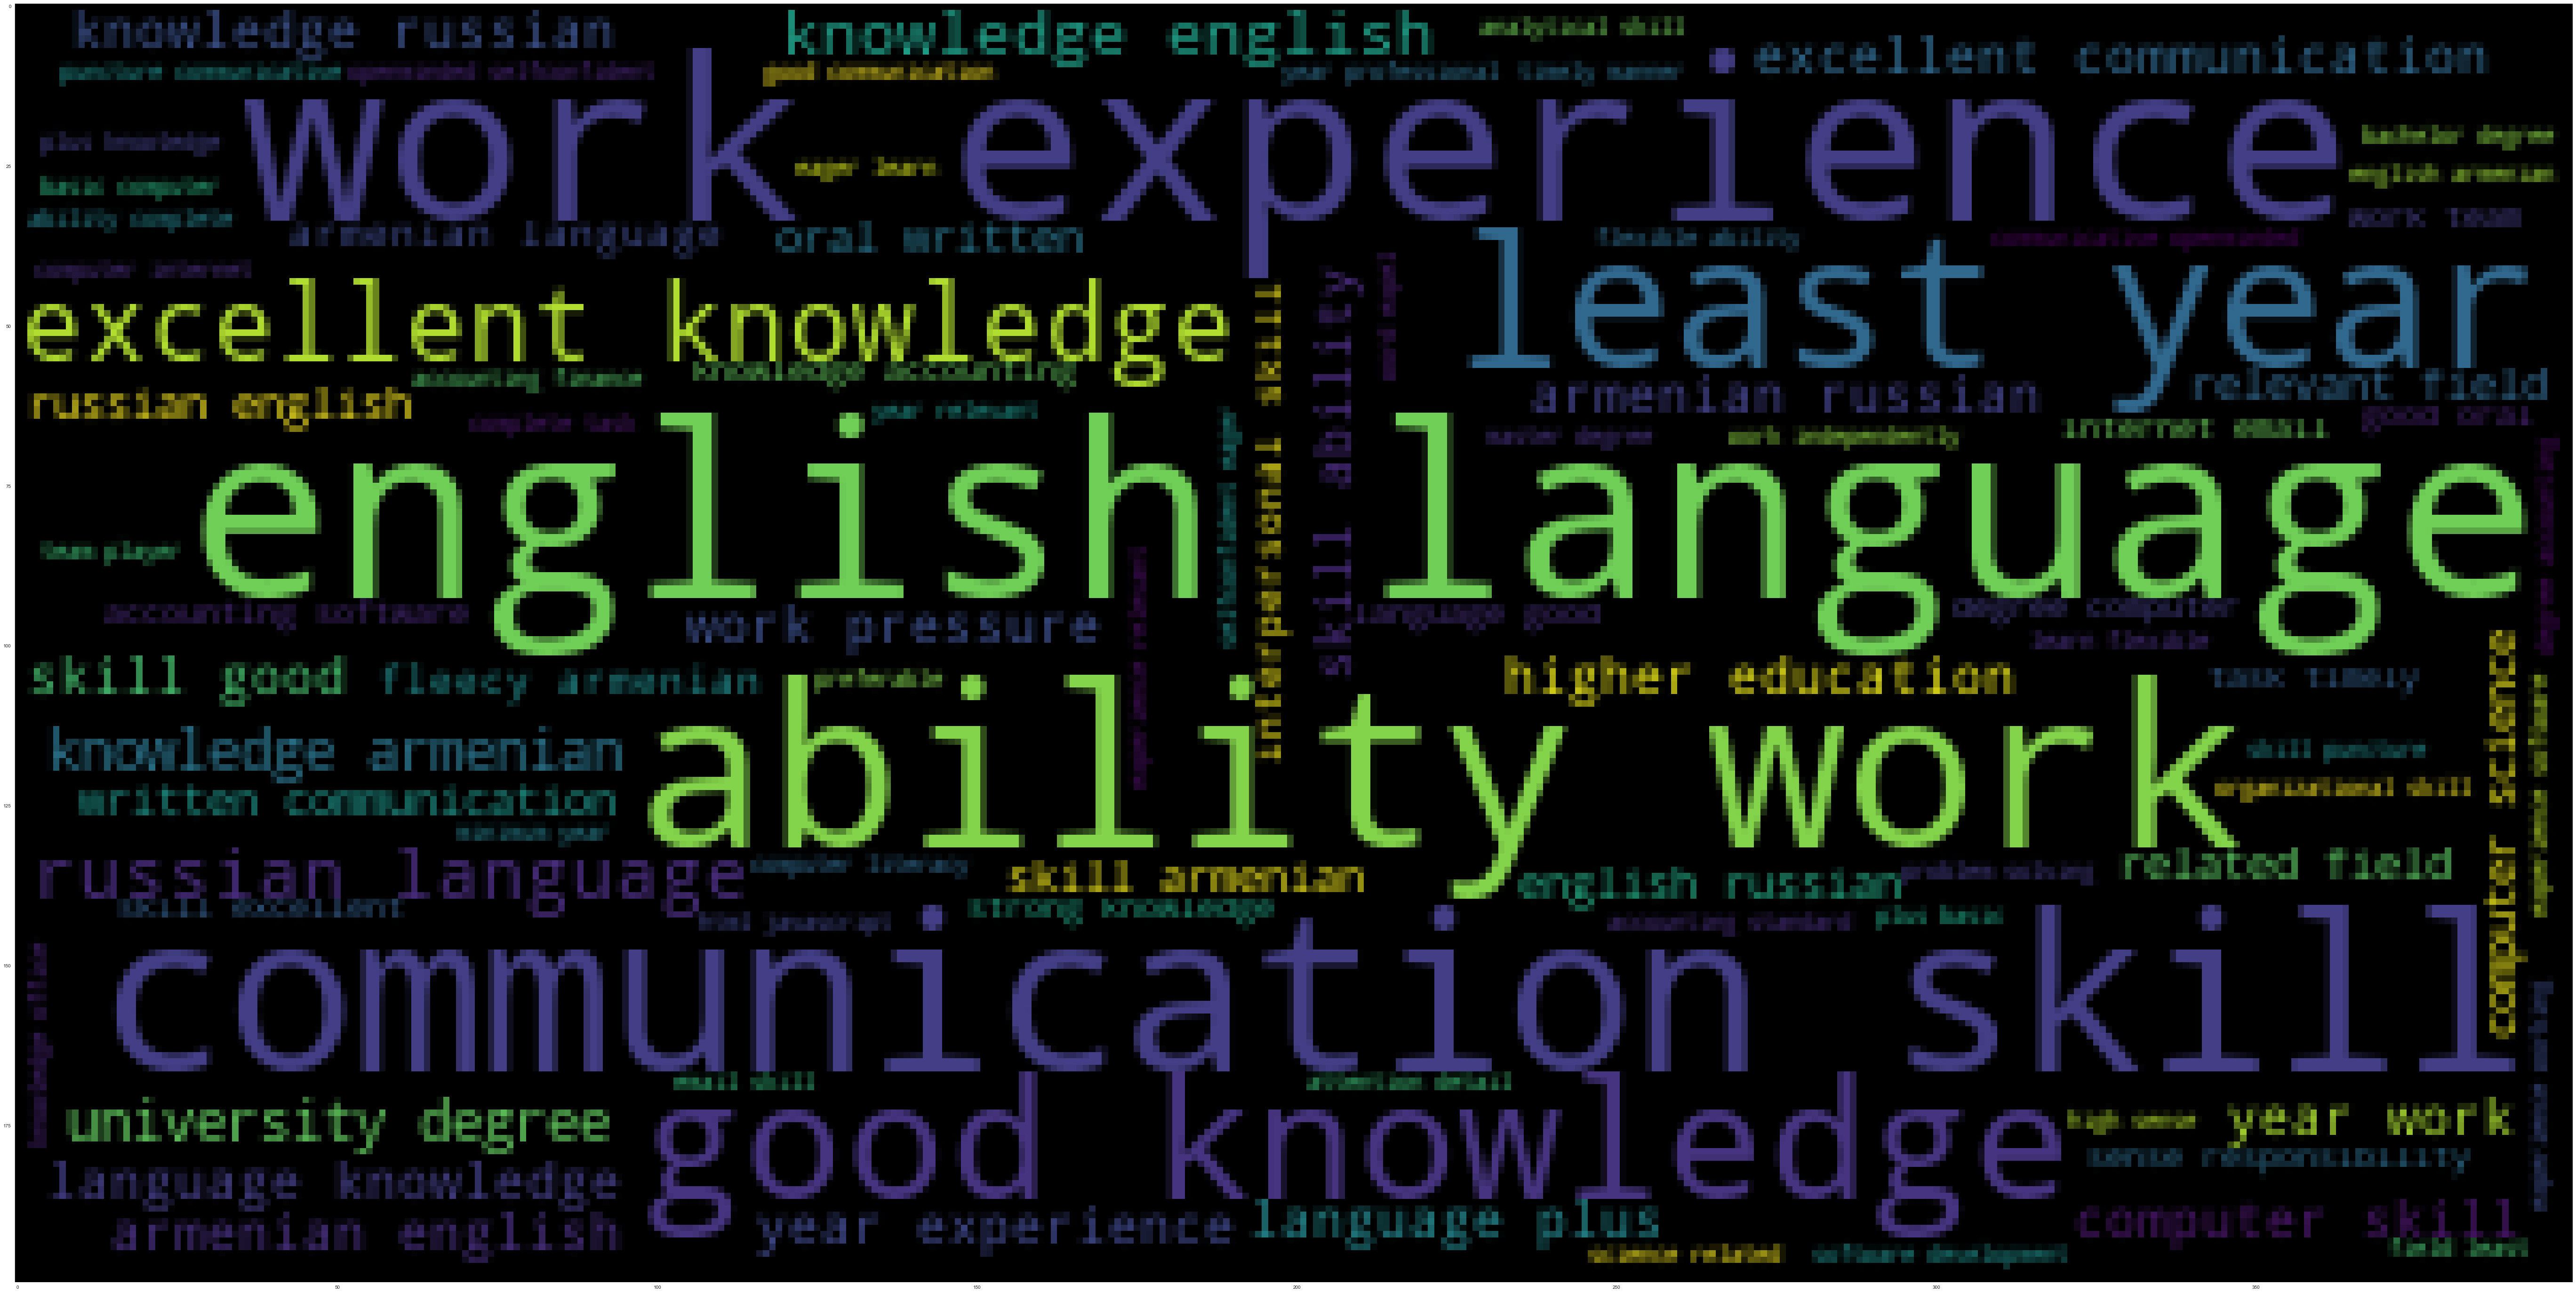

In [216]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Create user defined function for train the models

In [217]:

def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    
    return metrics.accuracy_score(predictions, valid_y)

### different models with different vectors

In [218]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB for L1, Count Vectors: ", accuracy_L1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)

NB for L1, Count Vectors:  0.9660574412532638
NB  for L1, WordLevel TF-IDF:  0.9738903394255874
NB  for L1, N-Gram Vectors:  0.8981723237597912
NB for L1, CharLevel Vectors:  0.9399477806788512


In [219]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9556135770234987
LR  for L1, WordLevel TF-IDF:  0.9712793733681462
LR  for L1, N-Gram Vectors:  0.9425587467362925
LR for L1, CharLevel Vectors:  0.9817232375979112


In [220]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.9765013054830287
SVC  for L1, WordLevel TF-IDF:  0.9686684073107049
SVC  for L1, N-Gram Vectors:  0.9608355091383812
SVC for L1, CharLevel Vectors:  0.9869451697127938


In [221]:
#Random Forest
# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Random Forest on Character Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9608355091383812
LR  for L1, WordLevel TF-IDF:  0.9686684073107049
LR  for L1, N-Gram Vectors:  0.95822454308094
LR for L1, CharLevel Vectors:  0.9765013054830287


In [222]:
#XGBoosting
# XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(XGBClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# XGBoosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9608355091383812
LR  for L1, WordLevel TF-IDF:  0.9634464751958225
LR  for L1, N-Gram Vectors:  0.9295039164490861
LR for L1, CharLevel Vectors:  0.9738903394255874


In [223]:
#ANN
# ANN on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



#ANN on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# ANN on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.97911227154047
LR  for L1, WordLevel TF-IDF:  0.9765013054830287
LR  for L1, N-Gram Vectors:  0.9686684073107049
LR for L1, CharLevel Vectors:  0.9843342036553525


In [225]:
#ANN +logistic
# ANN +logistic on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# ANN +logistic on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN +logistic on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# ANN +logistic on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9738903394255874
LR  for L1, WordLevel TF-IDF:  0.97911227154047
LR  for L1, N-Gram Vectors:  0.9712793733681462
LR for L1, CharLevel Vectors:  0.9843342036553525


In [226]:
#OneVsRest + XGBoosting
# OneVsRest + XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# OneVsRest + XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# OneVsRest + XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# OneVsRest + XGBoosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)


LR  for L1, Count Vectors:  0.9608355091383812
LR  for L1, WordLevel TF-IDF:  0.9634464751958225
LR  for L1, N-Gram Vectors:  0.9295039164490861
LR for L1, CharLevel Vectors:  0.9738903394255874


#### Adding Features to a Document-Term Matrix

In [227]:
# create a DataFrame that only contains the IT=1 and IT=0
job_post = df[(df.IT==0)| (df.IT==1)]

# define X and y
feature_cols = ['RequiredQual','sentiment']
X = df[feature_cols]
y = df.IT

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [228]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(1914, 22023)
(638, 22023)


(1914, 1)

In [229]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(1914, 3585)
(638, 3585)


(1914, 1)

In [230]:

# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('RequiredQual', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('RequiredQual', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(638, 3586)

In [231]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp

0.987460815047022

In [232]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp1

0.9890282131661442

In [233]:
# use Random Forest with text column only
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm, y_train)
y_pred_class = rmf.predict(X_test_dtm,)
acc_rmf=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf

0.9796238244514106

In [234]:
# use Random Forest with all features
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm_extra, y_train)
y_pred_class = rmf.predict(X_test_dtm_extra)
acc_rmf1=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf1

0.9764890282131662

In [236]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

0.9811912225705329

In [237]:
# use logistic regression with text column only
logreg= LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log1=metrics.accuracy_score(y_test, y_pred_class)
acc_log1

0.9811912225705329

In [238]:
# use Xtreme Boosting with text column only
xgb = XGBClassifier()
xgb.fit(X_train_dtm, y_train)
y_pred_class = xgb.predict(X_test_dtm)
acc_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb

0.9858934169278997

In [239]:
# use Xtreme Boosting with text column only
xgb =XGBClassifier()
xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = xgb.predict(X_test_dtm_extra)
acc_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb1

0.9827586206896551

In [240]:
# use ANN and logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp_ln=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln

0.9858934169278997

In [241]:
# use ANN and logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp_ln1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln1

0.9858934169278997

In [242]:
# use OneVsRest and Boosting with text column only
one_xgb = OneVsRestClassifier(XGBClassifier())
one_xgb.fit(X_train_dtm, y_train)
y_pred_class = one_xgb.predict(X_test_dtm)
acc_one_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_one_xgb

0.9858934169278997

In [243]:
# use OneVsRest and Boosting with all features
one_xgb = OneVsRestClassifier(XGBClassifier())
one_xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = one_xgb.predict(X_test_dtm_extra)
acc_one_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_one_xgb1

0.9827586206896551

In [244]:
# use SVM with text column only
sm =svm.LinearSVC()
sm.fit(X_train_dtm, y_train)
y_pred_class = sm.predict(X_test_dtm)
acc_svm=metrics.accuracy_score(y_test, y_pred_class)
acc_svm

0.9858934169278997

In [245]:
# use SVM with all features
svm1 = svm.LinearSVC()
svm1.fit(X_train_dtm_extra, y_train)
y_pred_class = svm1.predict(X_test_dtm_extra)
acc_svm1=metrics.accuracy_score(y_test, y_pred_class)
acc_svm1

0.9858934169278997

Text(0.5, 16.0, 'Predicted label')

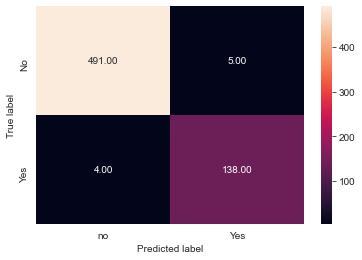

In [246]:
cm = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [247]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','ANN','ANN + logistic','OneVsRest + XGBoosting','sm'],
    
    'Score': [acc_log,acc_rmf,acc_xgb,acc_mlp,acc_mlp_ln,acc_one_xgb,acc_svm]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,ANN,0.987461
2,XGBoosting,0.985893
4,ANN + logistic,0.985893
5,OneVsRest + XGBoosting,0.985893
6,sm,0.985893
0,Logistic Regression,0.981191
1,Random Forest,0.979624


In [248]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','ANN','ANN + logistic','OneVsRest + XGBoosting','svm1'],
    
    'Score': [acc_log1,acc_rmf1,acc_xgb1,acc_mlp1,acc_mlp_ln1,acc_one_xgb1,acc_svm1]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,ANN,0.989028
4,ANN + logistic,0.985893
6,svm1,0.985893
2,XGBoosting,0.982759
5,OneVsRest + XGBoosting,0.982759
0,Logistic Regression,0.981191
1,Random Forest,0.976489


##### We got best accuracy by ANN

### Unsupervised Learning

In [249]:
# Data Selection
df2 = job_post[['RequiredQual']]

In [250]:
df2['RequiredQual'] = df2['RequiredQual'].astype(str)

#### K-Means Clustering

In [251]:
from nltk.util import ngrams

#### Removal of Punctuations and Conversion to Lower-case

In [253]:
def remove_punctuations(text):
    text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text) # Remove punctuations
    text=text.lower()                                       # Convert text to lower
    return(text)

df2['RequiredQual']=df2['RequiredQual'].apply( lambda x: remove_punctuations(x))
df2['RequiredQual'].head(4)

4     - university degree; economical background is ...
19    as a gd you are creative, innovative and have\...
20    - fluency in spoken and written english; knowl...
21    - university degree in jurisprudence;\n- exper...
Name: RequiredQual, dtype: object

In [255]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(df2['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=0.1, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [257]:
X_train = vectorizer.transform(df2['RequiredQual'])
vocab = vectorizer.get_feature_names()

In [258]:
vocab[:10]

['ability',
 'ability work',
 'ability work pressure',
 'accounting',
 'analytical',
 'applications',
 'armenian',
 'armenian english',
 'armenian english languages',
 'armenian russian']

In [288]:
# get the tf-idf table 
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(df2['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=None,
                min_df=0.05, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [289]:
# Create a training data
X_train = vectorizer.transform(df2['RequiredQual'])

In [291]:
# Use SVD to reduce dimensions
svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X_train)

In [292]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 99%


In [293]:
range_n_clusters = list (range(4,11))

In [294]:

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_lsa)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_lsa, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 4, silhouette score is 0.1225192616562013
For n_clusters = 5, silhouette score is 0.12245133774539282
For n_clusters = 6, silhouette score is 0.12226542847512512
For n_clusters = 7, silhouette score is 0.12338714783124358
For n_clusters = 8, silhouette score is 0.12430090049971
For n_clusters = 9, silhouette score is 0.11745394316384379
For n_clusters = 10, silhouette score is 0.11839051894590172


##### Best number of clusters are 8 because of highest silhouette score.

In [295]:
# we create a kmeans model
model = KMeans(n_clusters=10, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [296]:
# apply the model on this prepared data
res = model.fit(X_train)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [297]:
# Getting the vocalbulary as well as cluster centers
# Firstly, set of words from the tf-idf itself
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

In [298]:
# Then, the cluster centers from the model fit that we stored on res
cluster_centers = np.array(res.cluster_centers_)

In [299]:
x=np.array((0.1,10,0.05,1.5))
print(x)
print(x.argsort())
res.cluster_centers_[0].argsort()

[ 0.1  10.    0.05  1.5 ]
[2 0 3 1]


array([  0, 137, 138, 139, 140, 143, 148, 149, 151, 152, 155, 156, 157,
       158, 159, 160, 163, 164, 165, 166, 136, 135, 134, 133,  99, 101,
       103, 104, 107, 110, 112, 113, 116, 167, 117, 240, 122, 124, 125,
       126, 127, 128, 129, 132, 118, 168, 171, 172, 212, 213, 214, 215,
       218, 219, 222, 223, 224, 211, 227, 229, 230, 231, 232, 233, 236,
       237, 238, 239, 228,  98, 210, 206, 173, 174, 175, 176, 177, 178,
       179, 184, 185, 207, 186, 190, 191, 193, 195, 197, 199, 200, 203,
       204, 189,  97, 241,  47,  35,  24,  14,  62,  34,  63,   9,   8,
        64,  65,  67,  68,  69,  70,   7,  71,  58,  55,  38,  39,  40,
        42,  43,  44,  13,  45,  12,  11,  10,  51,  52,  54,  46,   6,
        66,  91,  88,  89,  86,  20,   5,  85,  84,  19,  90,  83,  82,
        21,   3,  87,  93,  80,   4,  79,  74,  75,  76,  92,  17,  77,
        41, 220, 221, 205, 102,  18,  96,  59, 181, 146, 183, 201, 225,
       162,  50, 119, 147,  33, 202,  57, 226, 161, 150, 100,  5

In [300]:
# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [301]:
# get top 10 words from that cluster
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

{'basic computer', 'communicative open', 'complete tasks', 'computer internet', 'mail skills', 'skills', 'skills punctual', 'plus basic', 'punctual communicative', 'communication skills'}
{'english language', 'mail skills', 'knowledge english', 'language', 'skills punctual', 'language knowledge', 'knowledge', 'communication skills', 'advantage', 'university degree', 'russian language', 'medical', 'basic computer', 'communicative open', 'complete tasks', 'computer internet', 'university', 'skills', 'plus basic', 'punctual communicative'}
{'english language', 'work', 'mail skills', 'knowledge english', 'language', 'skills punctual', 'language knowledge', 'knowledge', 'communication skills', 'strong', 'ability', 'advantage', 'university degree', 'marketing', 'russian language', 'medical', 'basic computer', 'communicative open', 'complete tasks', 'computer internet', 'university', 'skills', 'plus basic', 'punctual communicative', 'sales', 'business', 'experience', 'excellent'}
{'english la

In [302]:
words=list(words)

In [303]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [305]:
#train_set[,]
df2.head()

,RequiredQual
4,- university degree; economical background is ...
19,"as a gd you are creative, innovative and have\..."
20,- fluency in spoken and written english; knowl...
21,- university degree in jurisprudence;\n- exper...
29,- university degree in finance or accounting;\...


In [307]:
# how many observations are in each cluster

df2['cluster'] = model.labels_
df2.groupby('cluster').count()

,RequiredQual
cluster,
0,186
1,105
2,155
3,457
4,332
5,273
6,186
7,207
8,353


In [312]:
# what does each cluster look like
df2.head()

,RequiredQual,cluster
4,- university degree; economical background is ...,7
19,"as a gd you are creative, innovative and have\...",5
20,- fluency in spoken and written english; knowl...,4
21,- university degree in jurisprudence;\n- exper...,4
29,- university degree in finance or accounting;\...,3


### Information Extraction

#### Information Extraction to Obtain Company Profile

In [329]:
data=pd.read_csv('data job posts.csv')

In [330]:
data['AboutC']=data['AboutC'].fillna(data['AboutC'].mode().iloc[0])

In [338]:
data['AboutC'].head(5)


0    Mentor Graphics Development Services CJSC is a...
1    The International Research & Exchanges Board (...
2    The Caucasus Environmental NGO Network is a\nn...
3    Mentor Graphics Development Services CJSC is a...
4    Mentor Graphics Development Services CJSC is a...
Name: AboutC, dtype: object

In [339]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

In [340]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [341]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [342]:

matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [344]:
matched_sents=[]
for t in data.AboutC:
    if pd.notnull(t) and t != 'NaN':
        t = re.sub(r'\s+', ' ', t)
        doc = nlp(t)
        matches = matcher(doc)
        token_set = []
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            token_set.append(span.text)    
        matched_sents.append(token_set)

In [345]:
flat_list = []
for row in matched_sents:
    for token in row:
        flat_list.append(token)

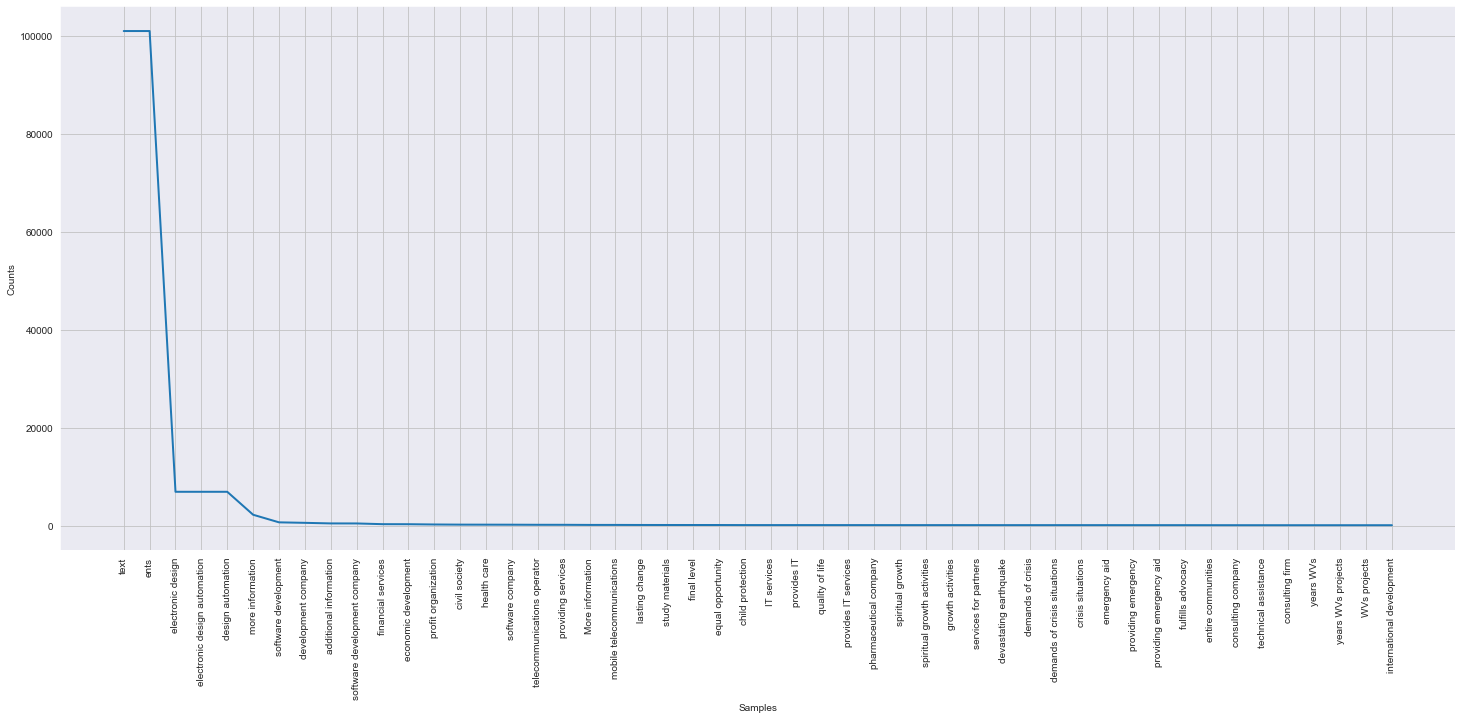

In [346]:
plt.figure(figsize=(25, 10))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)
plt.show()

### Job Similarity

In [360]:
df1=data[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']]

In [362]:
df1['Title'].fillna(df1['Title'].mode()[0], inplace=True)
df1['jobpost'].fillna(df1['jobpost'].mode()[0], inplace=True)
df1['JobDescription'].fillna(df1['JobDescription'].mode()[0], inplace=True)
df1['JobRequirment'].fillna(df1['JobRequirment'].mode()[0], inplace=True)
df1['RequiredQual'].fillna(df1['RequiredQual'].mode()[0], inplace=True)


### Using TF-IDF

In [363]:
df1['JobDescription_token'] = df1['JobDescription'].map(word_tokenize)
df1['RequiredQual_token'] = df1['RequiredQual'].map(word_tokenize)
df1['JobRequirment_token'] = df1['JobRequirment'].map(word_tokenize)

In [364]:
tfidf_model = TfidfVectorizer()
Title_tfidf = tfidf_model.fit_transform(df1['Title'])
JobDescription_tfidf = tfidf_model.fit_transform(df1['JobDescription'])
RequiredQual_tfidf = tfidf_model.fit_transform(df1['RequiredQual'])
JobRequirment_tfidf = tfidf_model.fit_transform(df1['JobRequirment'])

In [365]:
def find_similar_jobs_tfidf(index, top_n = 5):
    Title_tfidf_cosine = cosine_similarity(Title_tfidf[index:index+1], Title_tfidf).flatten()
    JobDescription_tfidf_cosine = cosine_similarity(JobDescription_tfidf[index:index+1], JobDescription_tfidf).flatten()
    RequiredQual_tfidf_cosine = cosine_similarity(RequiredQual_tfidf[index:index+1], RequiredQual_tfidf).flatten()
    JobRequirment_tfidf_cosine = cosine_similarity(JobRequirment_tfidf[index:index+1], JobRequirment_tfidf).flatten()

    average_cosine = (Title_tfidf_cosine +JobDescription_tfidf_cosine+RequiredQual_tfidf_cosine+JobRequirment_tfidf_cosine)/4.0
    related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
    return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]

### Chief Financial Officer Jobs

In [367]:
df1.iloc[0]

jobpost                 AMERIA Investment Consulting Company\nJOB TITL...
Title                                             Chief Financial Officer
JobRequirment           - Supervises financial management and administ...
JobDescription          AMERIA Investment Consulting Company is seekin...
RequiredQual            To perform this job successfully, an\nindividu...
JobDescription_token    [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token      [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token     [-, Supervises, financial, management, and, ad...
Name: 0, dtype: object

In [368]:
for index, score in find_similar_jobs_tfidf(0):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Organization for Implementation of North-South...
Title                                             Chief Financial Officer
JobRequirment           Financial management of the NSRCIP T1 & T2 pro...
JobDescription          The Chief Financial Officer (CFO) will support...
RequiredQual            - Degree in Accounting, Finance, Business, Law...
JobDescription_token    [The, Chief, Financial, Officer, (, CFO, ), wi...
RequiredQual_token      [-, Degree, in, Accounting, ,, Finance, ,, Bus...
JobRequirment_token     [Financial, management, of, the, NSRCIP, T1, &...
Name: 12368, dtype: object
SIMILARITY SCORE:  0.49834474358571085
jobpost                 River Island\nTITLE:  Chief Financial Officer\...
Title                                             Chief Financial Officer
JobRequirment           - Develop tools and systems to provide critica...
JobDescription          River Island is seeking a Chief Financial Offi...
RequiredQual            - Master's degree in M

### International Research & Exchanges Board Jobs

In [369]:
df1.iloc[1]

jobpost                 International Research & Exchanges Board (IREX...
Title                   Full-time Community Connections Intern (paid i...
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 1, dtype: object

In [370]:
for index, score in find_similar_jobs_tfidf(1):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 International Research & Exchanges Board (IREX...
Title                    Non-paid part or full time Administrative Intern
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication skills;\n- Good oral...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Excellent, communication, skills, ;, -, Go...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 11, dtype: object
SIMILARITY SCORE:  0.6798353526927008
jobpost                 International Research & Exchanges Board (IREX...
Title                      Non-paid part or full time Programmatic Intern
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication 

### Caucasus Environmental NGO Network job

In [371]:
df1.iloc[2]

jobpost                 Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                 Country Coordinator
JobRequirment           - Working with the Country Director to provide...
JobDescription          Public outreach and strengthening of a growing...
RequiredQual            - Degree in environmentally related field, or ...
JobDescription_token    [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token      [-, Degree, in, environmentally, related, fiel...
JobRequirment_token     [-, Working, with, the, Country, Director, to,...
Name: 2, dtype: object

In [372]:
for index, score in find_similar_jobs_tfidf(2):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Caucasus Environmental NGO Network\nTITLE:  Co...
Title                                       Country Coordinator - Armenia
JobRequirment           -  Write first hand articles, conduct intervie...
JobDescription          CENN - Caucasus Environmental NGO Network - is...
RequiredQual            1. Education: University education in environm...
JobDescription_token    [CENN, -, Caucasus, Environmental, NGO, Networ...
RequiredQual_token      [1, ., Education, :, University, education, in...
JobRequirment_token     [-, Write, first, hand, articles, ,, conduct, ...
Name: 404, dtype: object
SIMILARITY SCORE:  0.4320651188012762
jobpost                 Veya  Ltd.\n\n\nTITLE:  Country Coordinator\n\...
Title                                                 Country Coordinator
JobRequirment           - Negotiate with potential customers;\n- Lobby...
JobDescription          Veya Ltd. is looking for a qualified Country\n...
RequiredQual            - At least 5 years of exp

### Using Pretrained Word2Vec Embedding

In [373]:
nlp = spacy.load('en_core_web_lg')

In [374]:
# Original text - Title
doc1 = nlp(df1.iloc[0]['Title'])
doc2 = nlp(df1.iloc[2]['Title'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
Chief Financial Officer 

DOC2:
 Country Coordinator 

 0.5373299805896293


In [375]:
# Original text - RequiredQual
doc1 = nlp(df1.iloc[0]['RequiredQual'])
doc2 = nlp(df1.iloc[2]['RequiredQual'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully, an
individual must be able to perform each essential duty satisfactorily.
The requirements listed below are representative of the knowledge,
skill, and/or ability required.
Knowledge of:
- Generally accepted accounting principles;
- Local accounting standards and legislation;
- State reporting requirements pertaining to accounting;
- Principles and practices of financial management and budgeting;
- Principles and practices of financial systems design and analysis;
- Principles and practices of contract management, records management,
and risk management;
- Principles and practices of management and supervision;
- Principles and practices of information systems management.
Ability to:
- Apply sound fiscal and administrative practices to the company's
activities;
- Plan, organize and supervise the work of subordinate employees,
including training them, assigning and evaluating their work, and
providing job performance feedback;
- Critically analyze

In [376]:
# removing stopwords and punctuations
doc1 = nlp(' '.join(df1.iloc[0]['RequiredQual_token']))
doc2 = nlp(' '.join(df1.iloc[2]['RequiredQual_token']))
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully , an individual must be able to perform each essential duty satisfactorily . The requirements listed below are representative of the knowledge , skill , and/or ability required . Knowledge of : - Generally accepted accounting principles ; - Local accounting standards and legislation ; - State reporting requirements pertaining to accounting ; - Principles and practices of financial management and budgeting ; - Principles and practices of financial systems design and analysis ; - Principles and practices of contract management , records management , and risk management ; - Principles and practices of management and supervision ; - Principles and practices of information systems management . Ability to : - Apply sound fiscal and administrative practices to the company's activities ; - Plan , organize and supervise the work of subordinate employees , including training them , assigning and evaluating their work , and providing job performance feedback

##### POS + RegexMatcher

In [393]:
matcher = Matcher(nlp.vocab)

In [394]:

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [395]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [396]:

matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [397]:
# RequiredQual
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', df1.iloc[job1_idx]['RequiredQual'])
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'RequiredQual_keywords', " ".join(keywords))

In [398]:
# JobDescription
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['JobDescription']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'JobDescription_keywords', " ".join(keywords))

In [403]:
# JobRequirment
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['JobRequirment']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'JobRequirment_keywords', " ".join(keywords))


In [404]:
df1.head(10)

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,JobDescription_token,RequiredQual_token,JobRequirment_token,RequiredQual_keywords,JobDescription_keywords,JobRequirment_keywords
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...","[AMERIA, Investment, Consulting, Company, is, ...","[To, perform, this, job, successfully, ,, an, ...","[-, Supervises, financial, management, and, ad...",essential duty accepted accounting accepted ac...,administrative functions complex staff complex...,financial management administrative staff assi...
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,- Participate in application design;\n- Provid...,The incumbent will work under the direct super...,- Bachelor's Degree; Master's is preferred;\n-...,"[The, incumbent, will, work, under, the, direc...","[-, Bachelor, 's, Degree, ;, Master, 's, is, p...","[-, Participate, in, application, design, ;, -...",Excellent skills Armenian languages Armenian t...,direct supervision front desk,application design design documentation local ...
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...","[Public, outreach, and, strengthening, of, a, ...","[-, Degree, in, environmentally, related, fiel...","[-, Working, with, the, Country, Director, to,...",related field relevant experience written flue...,Public outreach growing network international ...,environmental information general public elect...
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...","[The, LEAD, (, Local, Enhancement, and, Develo...","[-, Advanced, degree, in, public, health, ,, s...","[-, Identify, gaps, in, knowledge, and, overse...",Advanced degree public health social science r...,apply state art approaches address provider ca...,Identify gaps gaps in knowledge overseeing inf...
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,- Rendering technical assistance to Database M...,The incumbent will work under the direct super...,- University degree; economical background is ...,"[The, incumbent, will, work, under, the, direc...","[-, University, degree, ;, economical, backgro...","[-, Rendering, technical, assistance, to, Data...",University degree economical background Excell...,direct supervision front desk,technical assistance servers maintenance serve...
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...",Saleswoman,- Participate in application design;\n- Provid...,Saleswoman will sell menswear and accessories.,"- Candidates should be female, 20-30 years old...","[Saleswoman, will, sell, menswear, and, access...","[-, Candidates, should, be, female, ,, 20-30, ...","[-, Participate, in, application, design, ;, -...",looking exterior Excellent communication Excel...,sell menswear,application design design documentation local ...
6,OSI Assistance Foundation - Armenian Branch Of...,Chief Accountant/ Finance Assistant,- Participate in application design;\n- Provid...,The Armenian Branch Office of the Open Society...,- University degree in finance/ accounting; \n...,"[The, Armenian, Branch, Office, of, the, Open,...","[-, University, degree, in, finance/, accounti...","[-, Participate, in, application, design, ;, -...",University degree year minimum year minimum ex...,seeking applications grant payments administra...,application design design documentation local ...
7,International Research & Exchanges Board (IREX...,Non-paid part or full time Programmatic Intern,- Participate in application design;\n- Provid...,The 

In [405]:
job_dissimilarity_df = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

In [406]:
for job1_idx in range(3):  # rows
    for job2_idx in range(1000):

        doc1 = nlp(df1.iloc[job1_idx]['Title'])
        doc2 = nlp(df1.iloc[job2_idx]['Title'])
        title_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobDescription_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobDescription_keywords'])
        jd_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobRequirment_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobRequirment_keywords'])
        jr_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['RequiredQual_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['RequiredQual_keywords'])
        rq_similarity = doc1.similarity(doc2)
        
        averaged_score = (title_similarity + jd_similarity + jr_similarity + rq_similarity) / 4.0
        job_dissimilarity_df = job_dissimilarity_df.append({'index': job1_idx, 'similar-job': job2_idx, 'dissimilar-score': (1-averaged_score)},ignore_index=True)

In [407]:
# Top similar jobs
job_dissimilarity_df_sorted = job_dissimilarity_df.sort_values(by=['index', 'dissimilar-score'], ascending=[True, True])
job_dissimilarity_df_sorted.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
697,0.0,697.0,0.069082
926,0.0,926.0,0.111218
120,0.0,120.0,0.113904
29,0.0,29.0,0.122753
420,0.0,420.0,0.123143
126,0.0,126.0,0.124174
479,0.0,479.0,0.129356
778,0.0,778.0,0.132108
234,0.0,234.0,0.136706


In [408]:
# Show top 5 similar results to job - Ameria Investment Consulting Job
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 0].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)].replace(r'\n',' ', regex=True))

jobpost                    AMERIA Investment Consulting Company JOB TITLE...
Title                                                Chief Financial Officer
JobRequirment              - Supervises financial management and administ...
JobDescription             AMERIA Investment Consulting Company is seekin...
RequiredQual               To perform this job successfully, an individua...
JobDescription_token       [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token         [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token        [-, Supervises, financial, management, and, ad...
RequiredQual_keywords      essential duty accepted accounting accepted ac...
JobDescription_keywords    administrative functions complex staff complex...
JobRequirment_keywords     financial management administrative staff assi...
Name: 0, dtype: object
jobpost                    Cascade Capital Holdings CJSC TITLE:  Chief Fi...
Title                                                

In [409]:
# Show top 5 similar results to job - International Research & Exchange Board
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 1].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    International Research & Exchanges Board (IREX...
Title                      Full-time Community Connections Intern (paid i...
JobRequirment              - Participate in application design;\n- Provid...
JobDescription             The incumbent will work under the direct super...
RequiredQual               - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token       [The, incumbent, will, work, under, the, direc...
RequiredQual_token         [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token        [-, Participate, in, application, design, ;, -...
RequiredQual_keywords      Excellent skills Armenian languages Armenian t...
JobDescription_keywords                        direct supervision front desk
JobRequirment_keywords     application design design documentation local ...
Name: 1, dtype: object
jobpost                    International Research & Exchanges Board (IREX...
Title                       Non-paid part or full tim

In [410]:
# Show top 5 similar results to job - Caucasus Environmental NGO Network
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 2].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                    Country Coordinator
JobRequirment              - Working with the Country Director to provide...
JobDescription             Public outreach and strengthening of a growing...
RequiredQual               - Degree in environmentally related field, or ...
JobDescription_token       [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token         [-, Degree, in, environmentally, related, fiel...
JobRequirment_token        [-, Working, with, the, Country, Director, to,...
RequiredQual_keywords      related field relevant experience written flue...
JobDescription_keywords    Public outreach growing network international ...
JobRequirment_keywords     environmental information general public elect...
Name: 2, dtype: object
jobpost                    International Medical Corps\nJOB TITLE:   Coun...
Title                                                